In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/bnflab/Documents/cell_det/yolov11


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24111MiB)
Setup complete ✅ (64 CPUs, 62.6 GB RAM, 2122.6/3666.0 GB disk)


## Fine-tune YOLO11 on custom dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("facialai-nfkit").project("solar-hapbf")
version = project.version(1)
dataset = version.download("yolov11")
                

mkdir: cannot create directory ‘/home/bnflab/Documents/cell_det/yolov11/datasets’: File exists
/home/bnflab/Documents/cell_det/yolov11/datasets


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to solar-1 in yolov11:: 100%|██████████| 278/278 [00:00<00:00, 7118.41it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=120 imgsz=640 plots=True

/home/bnflab/Documents/cell_det/yolov11


100%|██████████████████████████████████████| 19.7M/19.7M [00:00<00:00, 59.5MB/s]
WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
New https://pypi.org/project/ultralytics/8.3.89 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24111MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/home/bnflab/Documents/cell_det/yolov11/datasets/solar-1/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, sp

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [7]:
!ls {HOME}/runs/segment/train/

args.yaml			 labels.jpg	   train_batch1.jpg
BoxF1_curve.png			 MaskF1_curve.png  train_batch2.jpg
BoxP_curve.png			 MaskP_curve.png   train_batch660.jpg
BoxPR_curve.png			 MaskPR_curve.png  train_batch661.jpg
BoxR_curve.png			 MaskR_curve.png   train_batch662.jpg
confusion_matrix_normalized.png  results.csv	   val_batch0_labels.jpg
confusion_matrix.png		 results.png	   val_batch0_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  weights


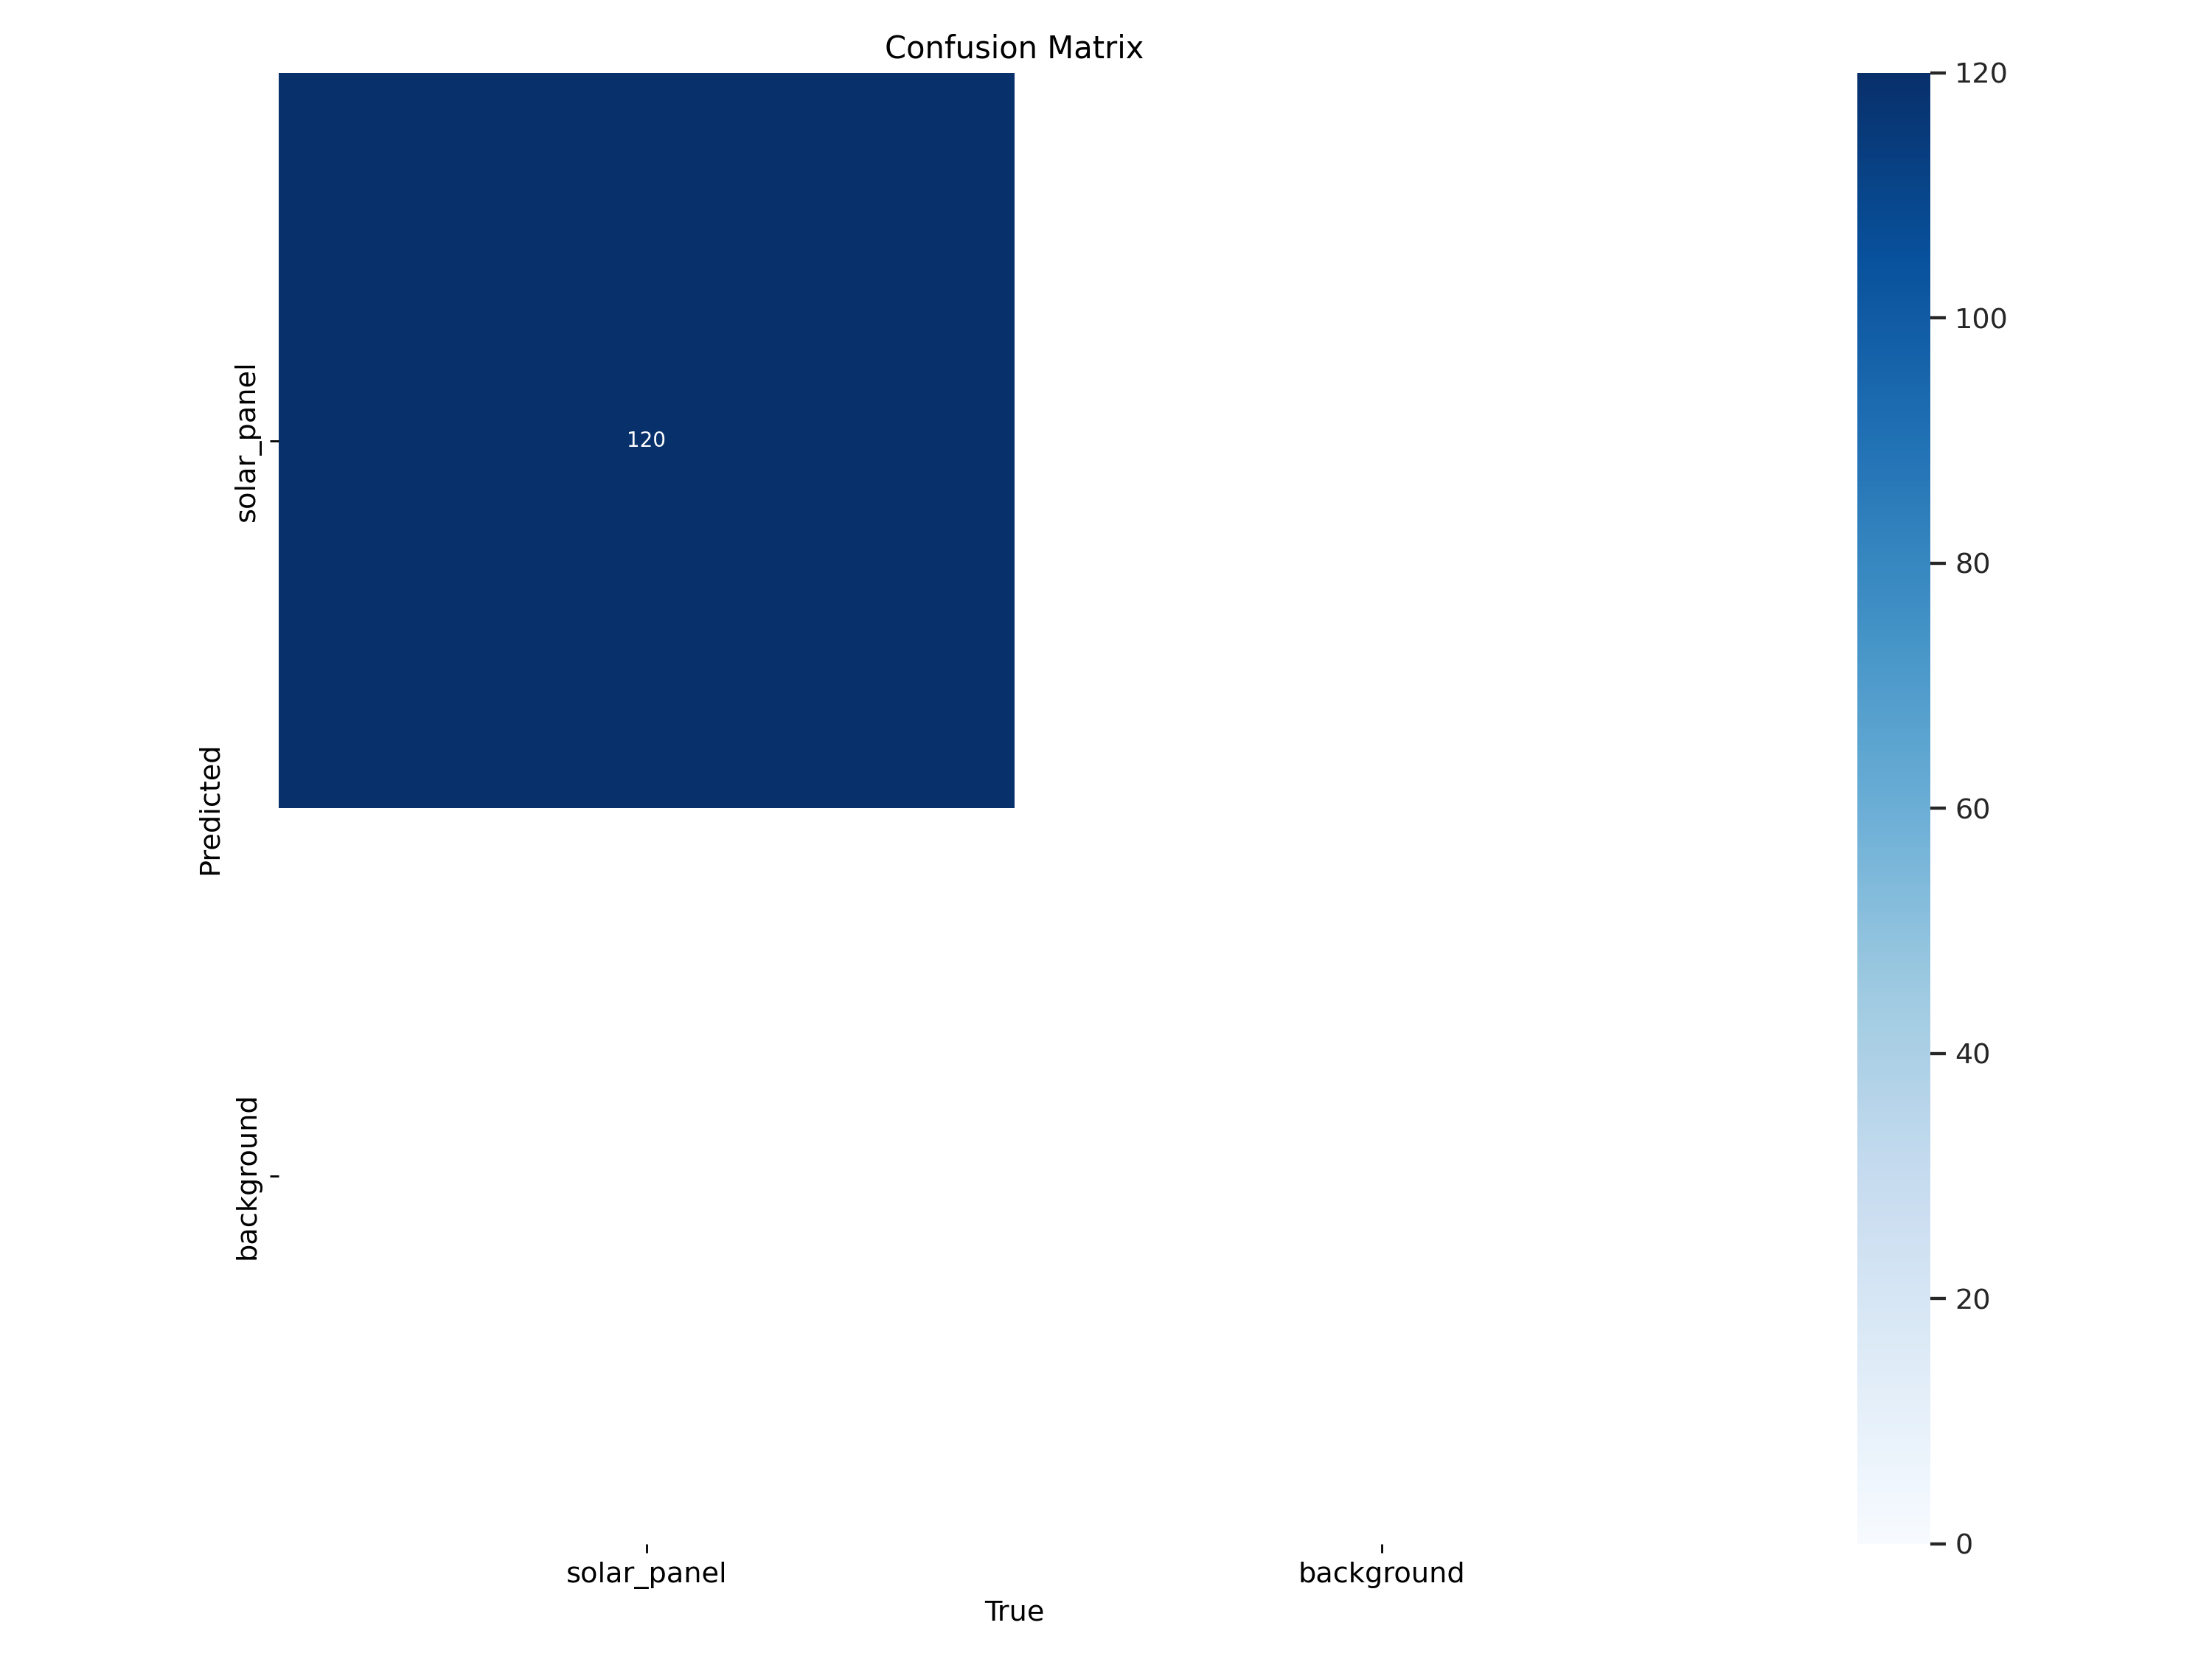

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

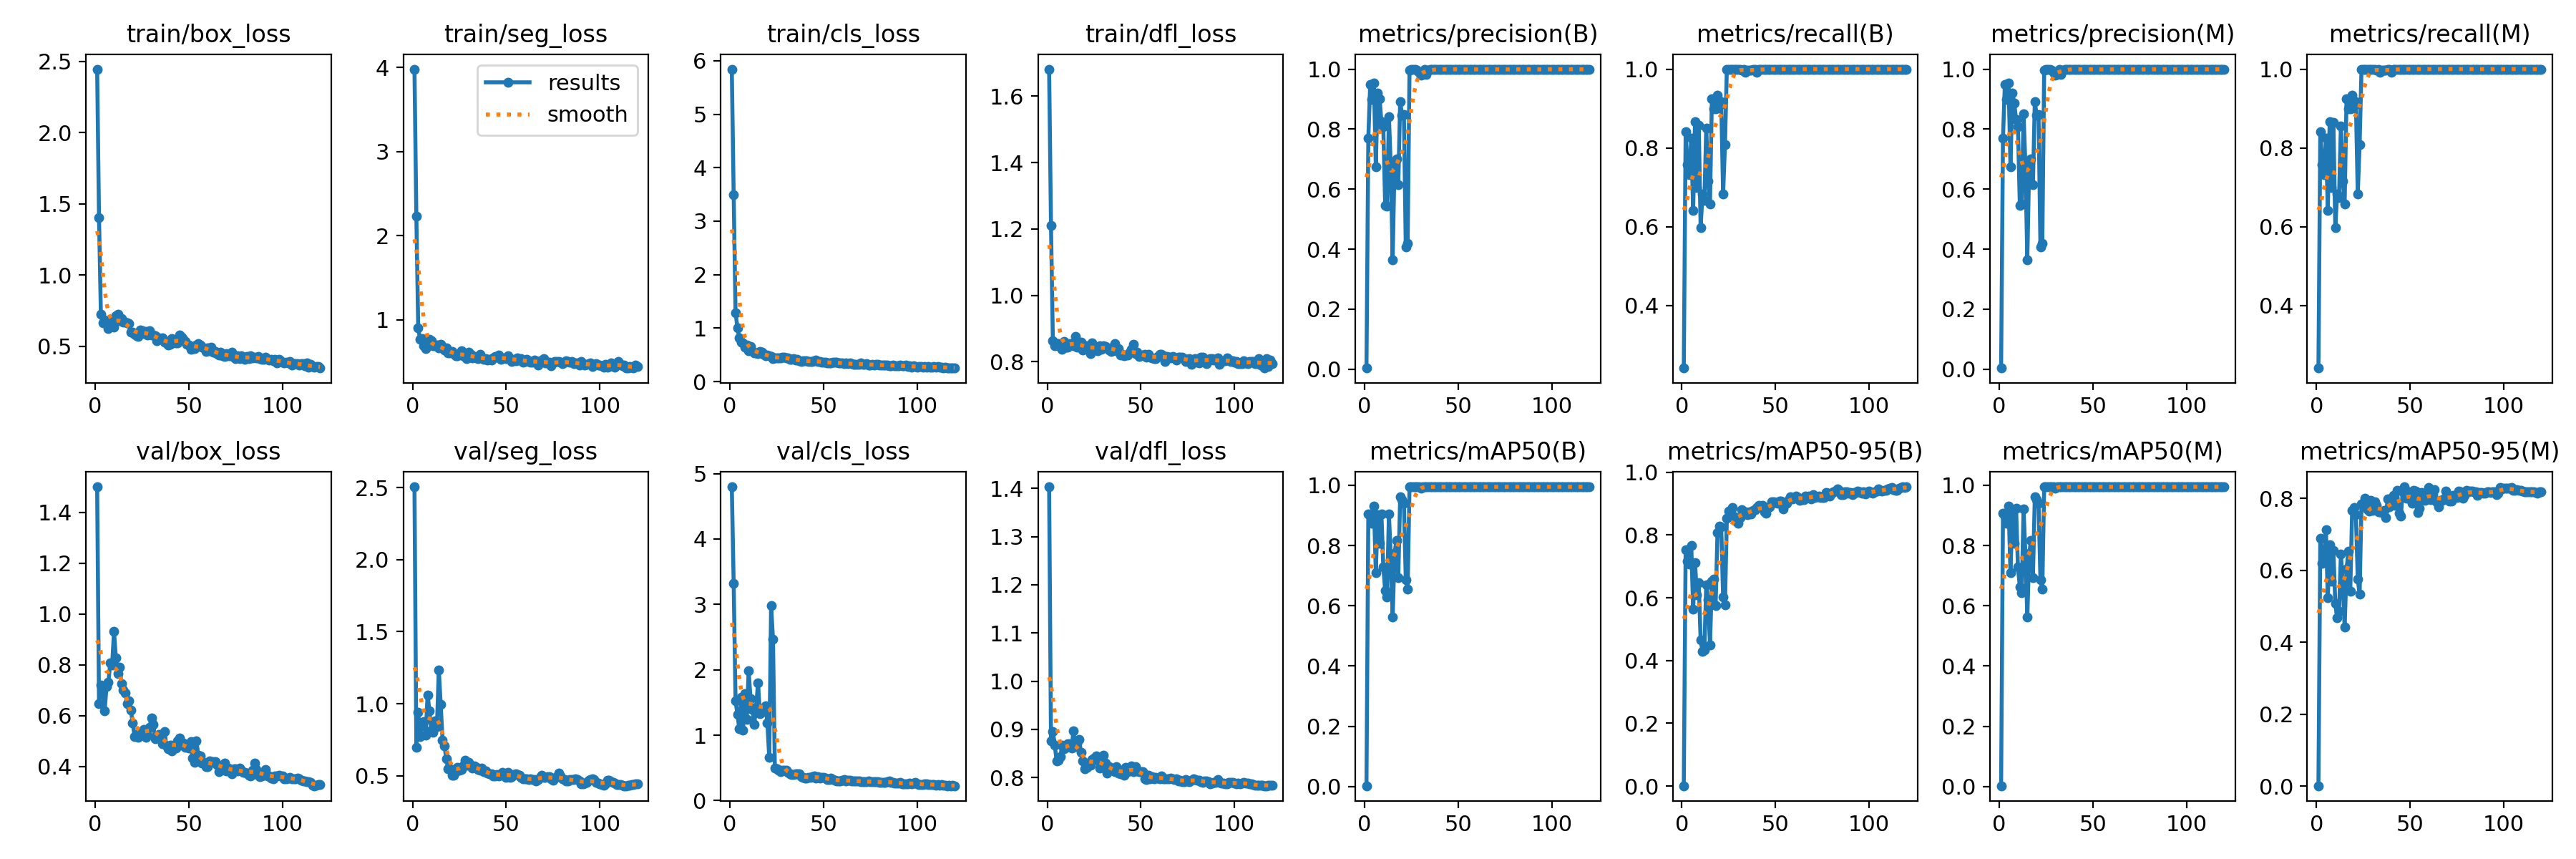

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

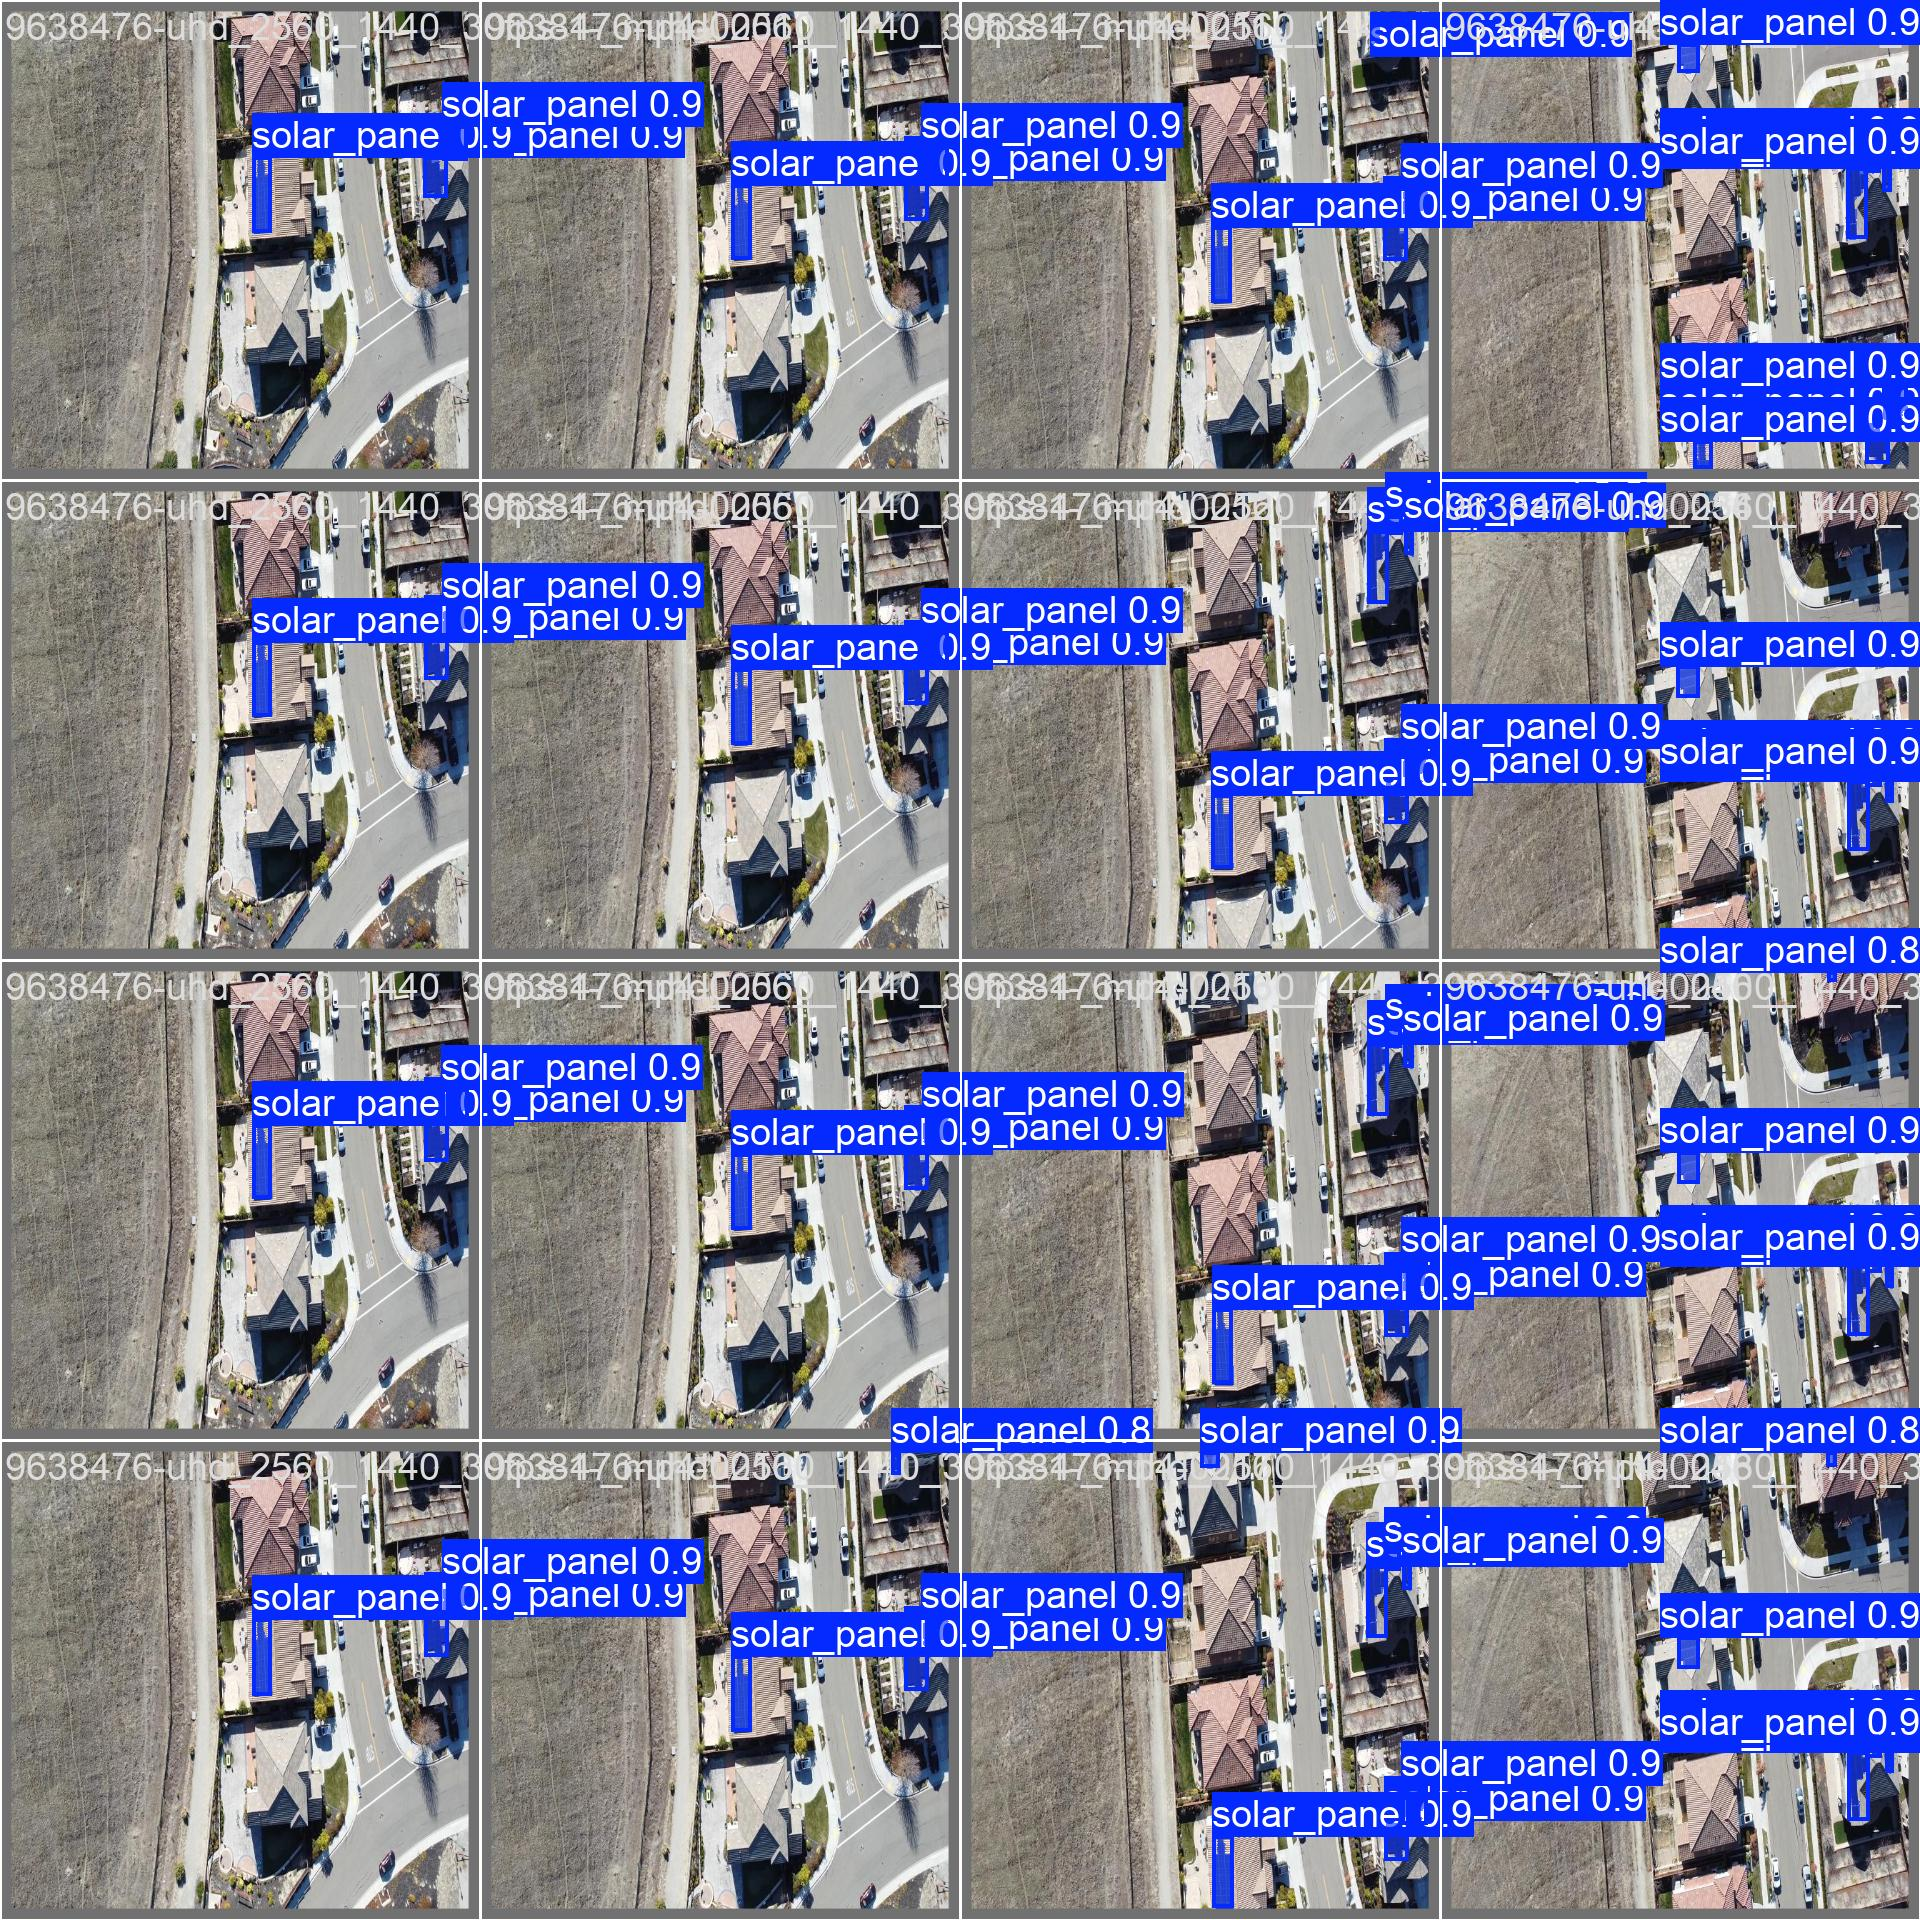

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [11]:
!yolo task=detect mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24111MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Scanning /home/bnflab/Documents/cell_det/yolov11/datasets/solar-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         27        120      0.999          1      0.995      0.963      0.999          1      0.995      0.801
Speed: 2.0ms preprocess, 5.0ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val
